# Example notebook for demo of loading waveform

In [1]:
from gw_eccentricity import load_waveform
from gw_eccentricity.plot_settings import use_fancy_plotsettings, labelsDict
import matplotlib.pyplot as plt
from gw_eccentricity.load_data import get_available_waveform_origins, get_load_waveform_defaults
import numpy as np
%load_ext autoreload
%autoreload 2

For loading waveform data from data file or generate using `LAL`, we use the function `load_waveform` from `load_data`.
The `load_waveform` function takes a `origin` as an input and a dictionary of `kwargs` required to generate the waveform
for the given `origin`.

## Available waveform `origin`s
Available waveform `origin` and the corresponding function it calls to load/import/generate the waveform data can be obtained using `get_available_waveform_origins()`

In [11]:
get_available_waveform_origins()

{'LAL': <function gw_eccentricity.load_data.load_LAL_waveform(**kwargs)>,
 'SXSCatalog': <function gw_eccentricity.load_data.load_sxs_catalogformat(**kwargs)>,
 'LVCNR': <function gw_eccentricity.load_data.load_lvcnr_waveform(**kwargs)>,
 'LVCNR_hack': <function gw_eccentricity.load_data.load_lvcnr_hack(**kwargs)>,
 'EOB': <function gw_eccentricity.load_data.load_EOB_waveform(**kwargs)>,
 'EMRI': <function gw_eccentricity.load_data.load_EMRI_waveform(**kwargs)>}

## Load waveform data using `LAL`

Waveform data can be generated using waveform models implemented in LALSuite library by calling `load_waveform` with `origin="LAL"` and relevant `kwargs`.<br>
As stated above, the allowed kwargs and their values can be obtained using `get_load_waveform_defaults("LAL")`

In [12]:
get_load_waveform_defaults("LAL")

{'approximant': 'EccentricTD',
 'q': 1.0,
 'chi1': [0.0, 0.0, 0.0],
 'chi2': [0.0, 0.0, 0.0],
 'ecc': 1e-05,
 'mean_ano': 0.0,
 'Momega0': 0.01,
 'deltaTOverM': 0.1,
 'physicalUnits': False,
 'M': None,
 'D': None,
 'include_zero_ecc': False}

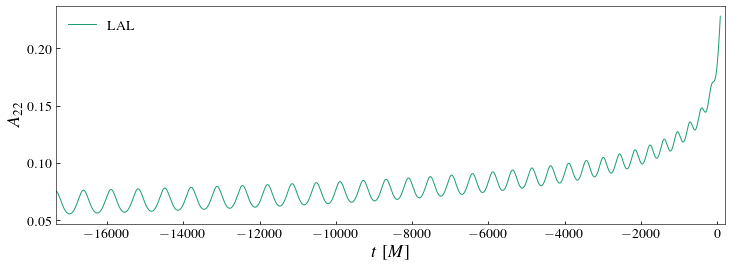

In [15]:
kwargs = {"q": 2.0,
          "ecc": 0.1}
origin = "LAL"
dataDict = load_waveform(origin, **kwargs)
# use better defaults for plotting
use_fancy_plotsettings()
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label=origin)
ax.set_xlim(dataDict["t"][0], 200)
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel(labelsDict["amp22"])
ax.legend(loc="upper left")

## Load waveform data from SXS catalog format file
Waveform data from a file in SXS catalog format can be loaded using `origin="SXSCatalog"` and providing necessary `kwargs`

The allowed `kwargs` and their default values are obtained using `get_load_waveform_defaults("SXSCatalog")`

In [26]:
origin = "SXSCatalog"
get_load_waveform_defaults(origin)

{'filepath': None,
 'metadata_path': None,
 'deltaTOverM': 0.1,
 'include_zero_ecc': False,
 'zero_ecc_approximant': 'IMRPhenomT',
 'num_orbits_to_remove_as_junk': 2,
 'mode_array': [(2, 2)],
 'extrap_order': 2}

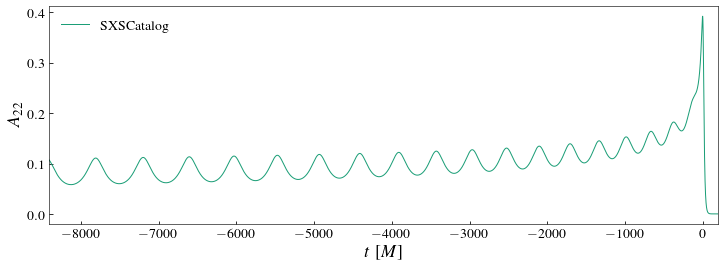

In [27]:
# Load nr data from sxs catalog format file using only filepath and using defaults for other args
kwargs = {"filepath": "/home1/md.shaikh/SXS/Private/Ecc1dSur_rerun/046/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5"}
dataDict = load_waveform(origin, **kwargs)

# use better defaults for plotting
use_fancy_plotsettings()
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label=origin)
ax.set_xlim(dataDict["t"][0], 200)
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel(labelsDict["amp22"])
ax.legend(loc="upper left")

### Load quasicircular counterpart for SXSCatalog format
For residual methods like `ResidualAmplitude`, we want to include the quasicircular counterpart also in the `dataDict`. This can be done by setting `include_zero_ecc` to `True` in `kwargs`
and providing the path to the simulation metadata, `metadata_path` in `kwargs`, to use the correct parameters for generating the quasicircular counterpart.

One can also choose what waveform model to use for generating quasicircular waveform via `zero_ecc_approximant`. The default is `IMRPhenomT`.

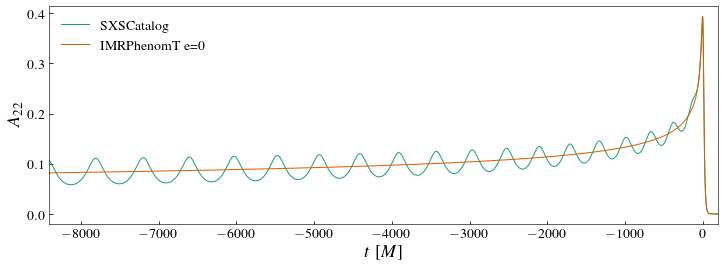

In [29]:
kwargs = {"filepath": "/home1/md.shaikh/SXS/Private/Ecc1dSur_rerun/046/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5",
         "metadata_path": "/home1/md.shaikh/SXS/Private/Ecc1dSur_rerun/046/Lev3/metadata.txt",
         "include_zero_ecc": True,
         "zero_ecc_approximant": "IMRPhenomT"}
dataDict = load_waveform(origin, **kwargs)

# use better defaults for plotting
use_fancy_plotsettings()
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label=origin)
ax.plot(dataDict["t_zeroecc"], np.abs(dataDict["hlm_zeroecc"][(2, 2)]), label=kwargs["zero_ecc_approximant"] + " e=0")
ax.set_xlim(dataDict["t"][0], 200)
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel(labelsDict["amp22"])
ax.legend(loc="upper left")

## Load waveform data from `LVCNR` format file
Waveform data from a file in `LVCNR` format can be loaded using `origin="LVCNR"` and providing necessary `kwargs`

The allowed `kwargs` and defaults are obtained using `get_load_waveform_defaults("LVCNR")`

In [22]:
origin = "LVCNR"
get_load_waveform_defaults(origin)

{'filepath': None,
 'deltaTOverM': 0.1,
 'Momega0': 0.0,
 'include_zero_ecc': False,
 'zero_ecc_approximant': 'IMRPhenomT',
 'num_orbits_to_remove_as_junk': 2}

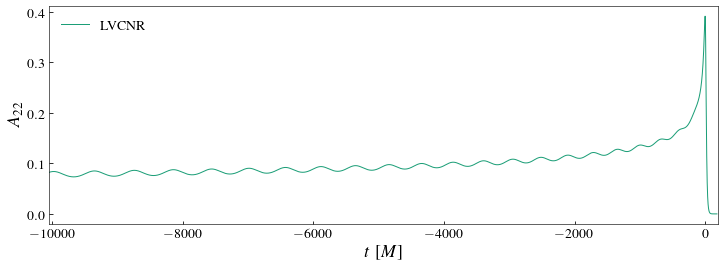

In [24]:
# Load nr data from LVCNR format file using only filepath and using defaults for other args
filepath = "/home1/md.shaikh/Eccentricity/data/ecc_waveforms/Non-Precessing/SXS/BBH_SHK_q1_0_0_e01_D20_Res3.h5"
kwargs = {"filepath": filepath}
dataDict = load_waveform(origin=origin, **kwargs)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label=origin)
ax.set_xlim(dataDict["t"][0], 200)
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel(labelsDict["amp22"])
ax.legend(loc="upper left")